### Problem Statement
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.

In [1]:
# Load libraries
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
dataset = pd.read_csv("Twoexams_results.csv")

In [3]:
# head
dataset

,exam1,exam2,class
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


## Analysis on data

In [4]:
dataset['class'].value_counts()

1    60
0    39
Name: class, dtype: int64

In [5]:
# shape
dataset.shape

(99, 3)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exam1   99 non-null     float64
 1   exam2   99 non-null     float64
 2   class   99 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [6]:
dataset['class'] = (dataset['class'].astype(str).
                    str.replace("1", "accepted").
                    str.replace("0", "not accepted"))

dataset.head()

,exam1,exam2,class
0,30.286711,43.894998,not accepted
1,35.847409,72.902198,not accepted
2,60.182599,86.308552,accepted
3,79.032736,75.344376,accepted
4,45.083277,56.316372,not accepted


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exam1   99 non-null     float64
 1   exam2   99 non-null     float64
 2   class   99 non-null     object 
dtypes: float64(2), object(1)
memory usage: 2.4+ KB


In [7]:
# descriptions
dataset.describe()

,exam1,exam2
count,99.000000,99.000000
mean,65.957614,66.102779
std,19.302009,18.638875
min,30.058822,30.603263
25%,51.297736,47.978125
50%,67.319257,66.589353
75%,80.234877,79.876423
max,99.827858,98.869436


Text(0, 0.5, 'degree')

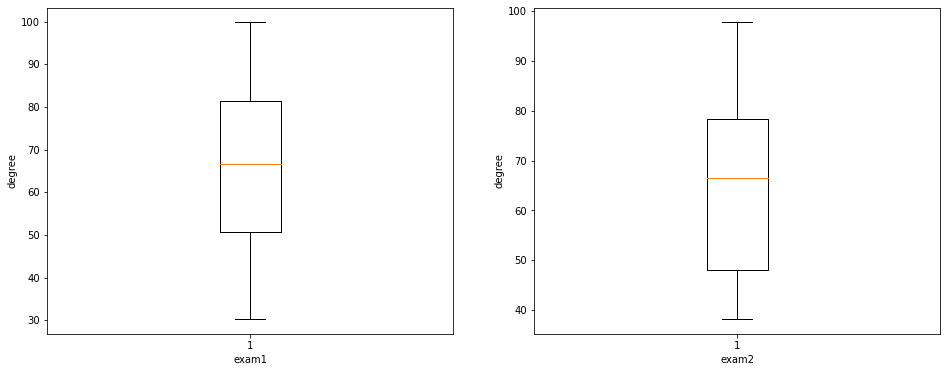

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].boxplot(X_train[:, 0]);
ax[0].set_xlabel("exam1")
ax[0].set_ylabel("degree")

ax[1].boxplot(X_train[:, 1]);
ax[1].set_xlabel("exam2")
ax[1].set_ylabel("degree")

In [11]:
# class distribution
dataset['class'].value_counts()

accepted        60
not accepted    39
Name: class, dtype: int64

## Create a Validation Dataset

In [8]:
array = dataset.values
X = array[:,0:2]
y = array[:,2]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

##  Data Visualization

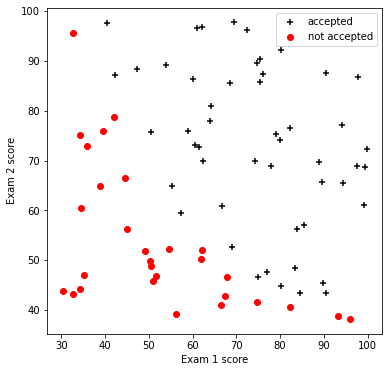

In [9]:
pos = Y_train == "accepted"
neg = Y_train == "not accepted"
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='+', c='black', label='accepted')
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', c='r', label='not accepted')
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

## Build Models

In [10]:
...
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.800000 (0.127475)
LDA: 0.900000 (0.156125)
KNN: 0.900000 (0.145774)
CART: 0.925000 (0.082916)
NB: 0.912500 (0.125623)
SVM: 0.685714 (0.079939)


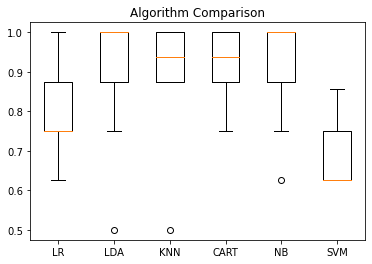

In [15]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

## Make prediction

In [13]:
# Make predictions on validation dataset
model =  DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
predictions

array(['accepted', 'accepted', 'accepted', 'accepted', 'not accepted',
       'accepted', 'not accepted', 'accepted', 'accepted', 'not accepted',
       'accepted', 'not accepted', 'not accepted', 'not accepted',
       'not accepted', 'accepted', 'accepted', 'accepted', 'accepted',
       'not accepted'], dtype=object)

## Evaluate Predictions

In [12]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[10  0]
 [ 2  8]]
              precision    recall  f1-score   support

    accepted       0.83      1.00      0.91        10
not accepted       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

